In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime # as dt
import re

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('AAPLprices.csv')
dataset = dataset.drop(["Unnamed: 0"],axis=1)
dataset

,0130,0327,0622,0810,1101
0,145.50,160.20,183.65,178.8500,170.4900
1,145.50,160.20,183.67,178.8800,170.4900
2,145.50,160.23,183.68,179.0000,170.3900
3,145.50,160.20,183.72,179.2000,170.6000
4,145.88,160.25,183.63,178.9500,170.3900
...,...,...,...,...,...
518444,143.19,158.39,186.73,178.3600,173.7950
518445,143.19,158.33,186.75,178.3600,173.7900
518446,143.19,158.36,186.73,178.3600,173.8000
518447,143.19,158.39,186.73,178.3900,173.7985


In [36]:
np.std(dataset["0130"])

0.6967722410956925

In [6]:
dataset = dataset.groupby(np.arange(len(dataset))//100).mean()
dataset

,0130,0327,0622,0810,1101
0,144.492300,159.671300,183.609700,179.145100,170.416800
1,144.061600,159.558300,183.427200,179.221300,170.384000
2,144.041200,159.684200,183.472500,179.248300,170.258200
3,144.029800,159.860200,183.427900,179.206300,170.314600
4,144.014000,159.811200,183.419300,179.116900,170.233100
...,...,...,...,...,...
5180,143.200887,158.384050,186.633533,178.307790,173.810493
5181,143.191823,158.349250,186.639665,178.330924,173.789087
5182,143.214179,158.325199,186.667150,178.370936,173.767425
5183,143.203039,158.314650,186.710795,178.400194,173.780594


In [7]:
training_set=dataset.iloc[0:4000,0:1].values
trgsset=pd.DataFrame(training_set)

test_set=dataset.iloc[4000:5185,0:1].values
tstset=pd.DataFrame(test_set)

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)
type(training_set_scaled), type(test_set_scaled), 

(numpy.ndarray, numpy.ndarray)

In [10]:
X_train=[]
y_train=[]
for i in range(60,4000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)   
print(X_train.shape, y_train.shape)
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1)) 

(3940, 60) (3940,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
### Initializing RNN
model = Sequential()

In [13]:
### Add first LSTM layer and add Dropout Reegularization
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1))) ### Sequential reads input as 3D
model.add(Dropout(0.2))

In [14]:
### Add second LSTM layer and Dropout
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [15]:
### Add third LSTM layer and Dropout
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [16]:
### Add fourth LSTM layer and Dropout
model.add(LSTM(units=50)) ### note: last LSTM layer does not carry argument 'return_sequences=True'
model.add(Dropout(0.2))

In [17]:
### Add output layer
model.add(Dense(units=1))  ### not capital "U"nit

In [18]:
### Compiling the RNN
model.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
### Run the training set with the LSTM (specialized RNN here)
model.fit(X_train,y_train,epochs=10,batch_size=10)

Epoch 1/10
394/394 [==============================] - 34s 54ms/step - loss: 0.0068
Epoch 2/10
394/394 [==============================] - 21s 54ms/step - loss: 0.0030
Epoch 3/10
394/394 [==============================] - 21s 54ms/step - loss: 0.0027
Epoch 4/10
394/394 [==============================] - 21s 54ms/step - loss: 0.0021
Epoch 5/10
394/394 [==============================] - 21s 54ms/step - loss: 0.0020
Epoch 6/10
394/394 [==============================] - 21s 54ms/step - loss: 0.0016
Epoch 7/10
394/394 [==============================] - 21s 54ms/step - loss: 0.0016
Epoch 8/10
394/394 [==============================] - 21s 54ms/step - loss: 0.0015
Epoch 9/10
394/394 [==============================] - 21s 54ms/step - loss: 0.0014
Epoch 10/10
394/394 [==============================] - 21s 54ms/step - loss: 0.0012


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [21]:
predict_train=model.predict(X_train) 
print(predict_train.shape) 

124/124 [==============================] - 7s 32ms/step
(3940, 1)


In [22]:
predict_train=predict_train[:, 0]
predict_train

array([0.47297966, 0.47430792, 0.47342134, ..., 0.08704799, 0.08146085,
       0.0743857 ], dtype=float32)

In [37]:
### creating data structure with 60 time-steps and 1 output
X_test=[]
y_test=[]  ### here y_test is to collect the predicted y values
for i in range(60,1180):
    X_test.append(test_set_scaled[i-60:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)  ### convert to np arrays as X_test is "list"    
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [38]:
y_test = np.reshape(y_test, (-1, 1))
y_train=np.reshape(y_train,(-1,1))

In [39]:
### Prediction
predicted_stock_price=model.predict(X_test)
predicted_stock_price=predicted_stock_price[:,0]
#predicted_stock_price1=sc.inverse_transform(predicted_stock_price)
#predicted_stock_price.shape

35/35 [==============================] - 1s 29ms/step


In [40]:
from sklearn.metrics import mean_squared_error
import math
def print_error(trainY, testY, train_predict, test_predict):    
    ### Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    ### Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))
    
print_error(y_train, y_test, predict_train, predicted_stock_price)

Train RMSE: 0.024 RMSE
Test RMSE: 0.016 RMSE


In [41]:
Pred_price=sc.inverse_transform(predicted_stock_price.reshape(-1, 1))

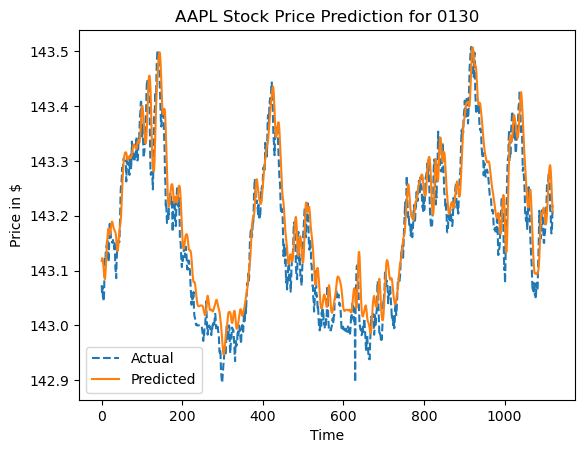

In [42]:
plt.plot(test_set[60:1180,:],label="Actual",linestyle='--') ### from observation 60 to 157  or 12 Aug 2016 to 30 Dec 2016
plt.plot(Pred_price,label="Predicted",linestyle='-')
plt.title('AAPL Stock Price Prediction for 0130')
plt.xlabel('Time')
plt.ylabel('Price in $')
plt.legend()
plt.show()

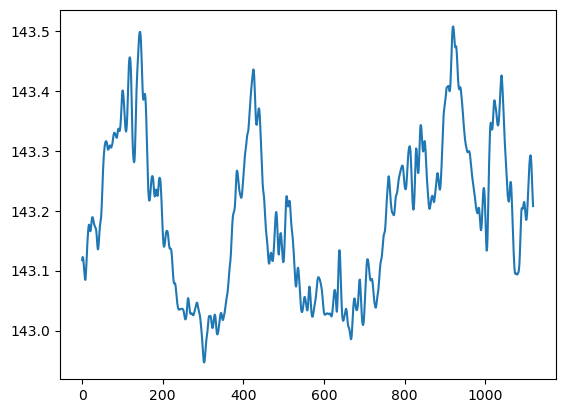

In [43]:
plt.plot(Pred_price,label="Predicted Google Price",linestyle='-')